In [2]:
# data from https://www.kaggle.com/datasets/deepakat002/indian-vehicle-number-plate-yolo-annotation/data

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
%matplotlib inline


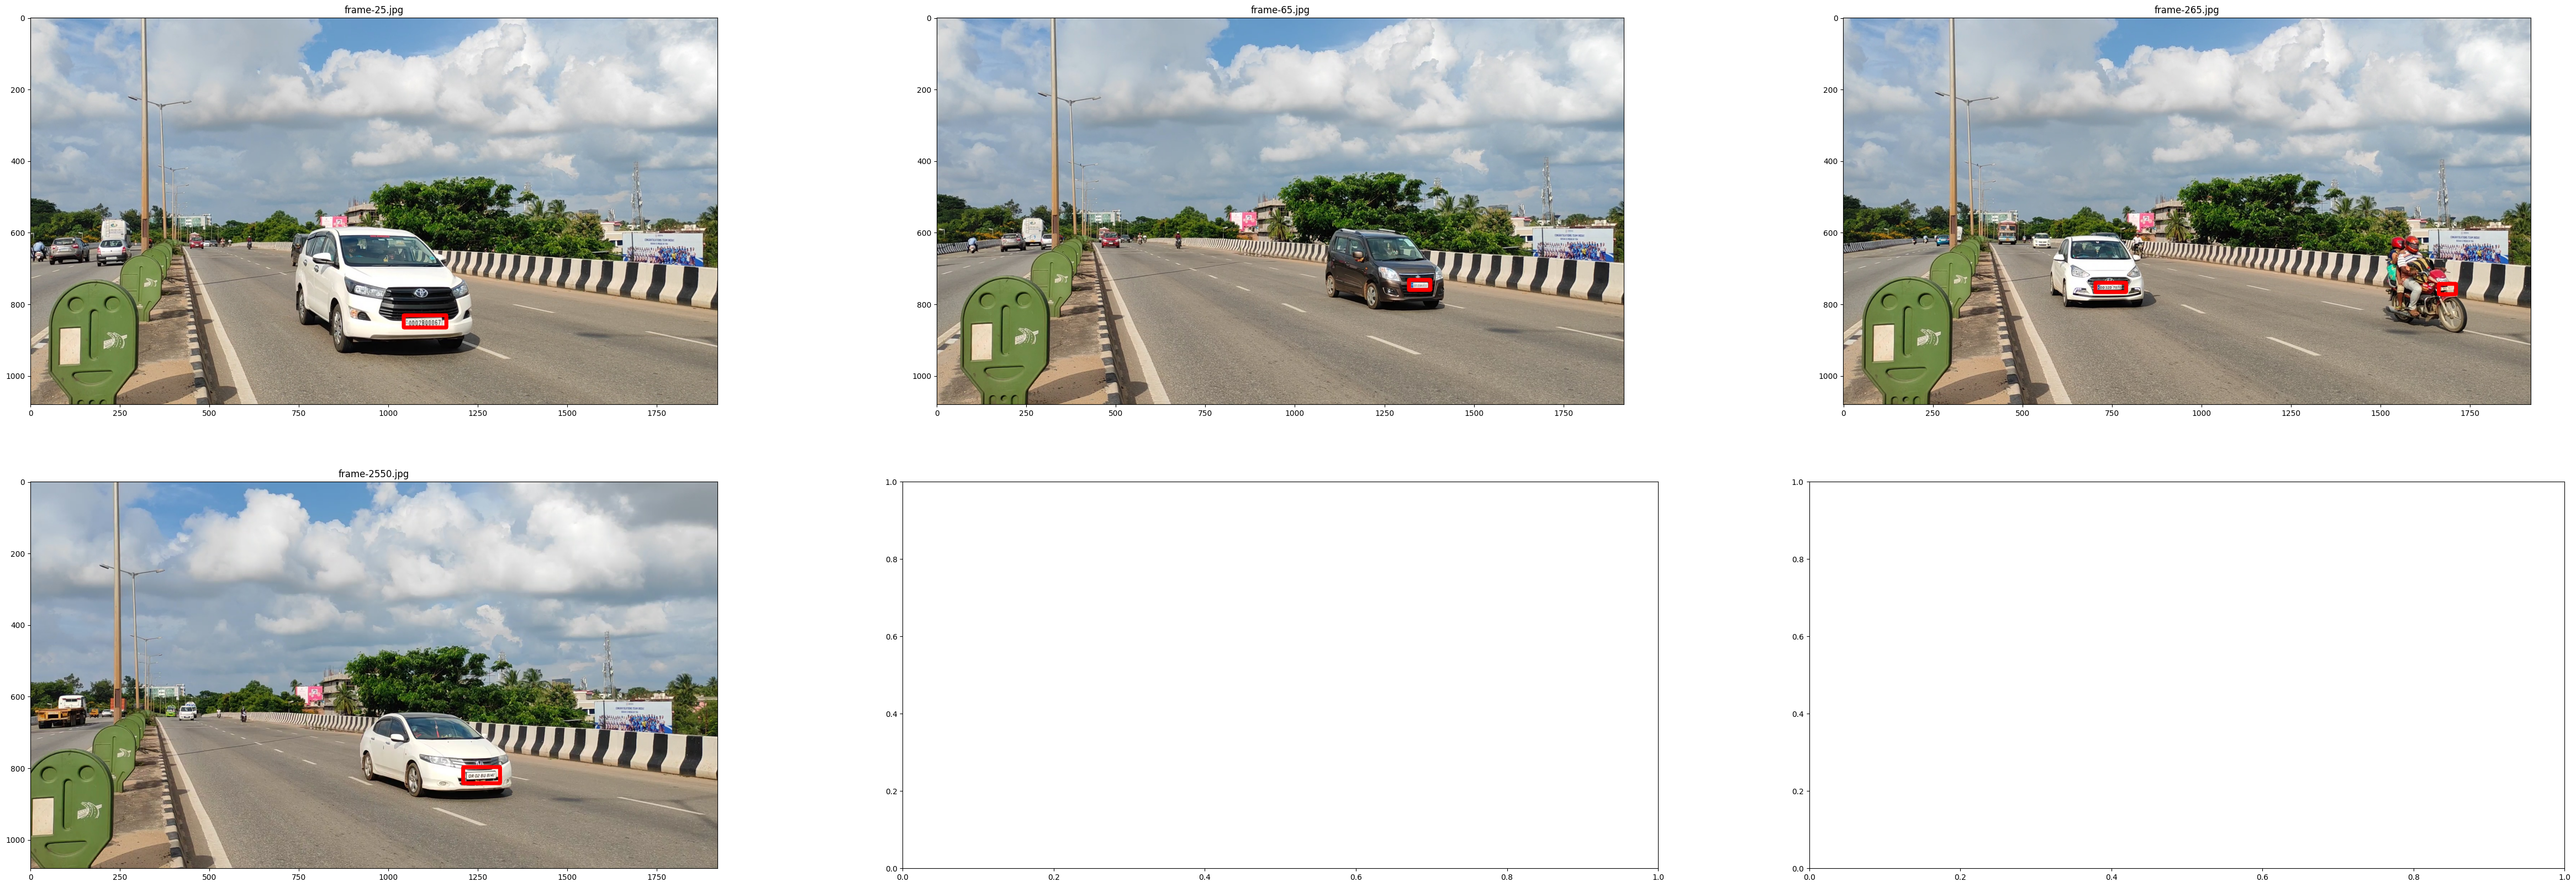

In [19]:
classes = ['plate']
def display_set(set_name, n):
    files = os.listdir('data/plate_detection/'+set_name)
    img_set  = [file for file in files if file.endswith('.jpg')]
    annotations = [file for file in files if file.endswith('.txt')]
    sample = np.random.randint(0, len(img_set), n)
    nrows = (n+2)//3
    figsize = (20 * 3, 10 * nrows)

    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=figsize)
    for i, index in enumerate(sample):
        ax = axes[i//3,i%3]
        img = img_set[index]
        annotation = annotations[index]
        image = cv2.imread('data/plate_detection/'+set_name+'/' + img)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        with open('data/plate_detection/'+set_name+'/' +annotation) as f:
            for line in f:
                class_index, x, y, w, h = line.split()
                image_height, image_width, _ = image.shape
                x, y, w, h = float(x)*image_width, float(y)*image_height, float(w)*image_width, float(h)*image_height
                image = cv2.rectangle(image, (int(x-w/2), int(y-h/2)), (int(x+w/2), int(y+h/2)), (255, 0, 0), 10)
        ax.imshow(image)
        ax.title.set_text(img)
    plt.show()

display_set('vid-1', 4)